In [ ]:
import sympy as sy
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
x = sy.Symbol('x')

In [ ]:
def LagrangePol(x,x_points,y_points):
    pol = 0 # Inisiasi nilai polinom diset menjadi
    n = len(x_points) # n adalah banyak titik
    for k in range(n):
        L = 1 # Inisiasi nilai L(n,k) diset menjadi 1
        for i in range(n):
            if i!=k:
                L*=((x-x_points[i])/(x_points[k]-x_points[i])) # Menghitung nilai L(n,k)
        pol += y_points[k]*L # Menghitung nilai aproksimasi dengan polinom
    return pol

In [ ]:
def DDTableGenerator(x_points,y_points): #buat fungsi untuk tabel DD
    DDTable = [y_points] #kolom-kolom pada tabel, Kolom pertama berisi f
    for column in range(1,len(y_points)):
        DDcolumn = [] #isi dari setiap kolom
        for row in range(len(DDTable[-1])-1): #mulai mengisi kolom tabel
            DD = (DDTable[-1][row+1]-DDTable[-1][row])\
            /(x_points[column+row]-x_points[row])
            DDcolumn.append(DD)
        DDTable.append(DDcolumn) #tambahkan kolom yang telah diisi ke tabel
    return DDTable

In [ ]:
def BackwardDD(x,x_points,y_points): #mendefinisikan backward NDD
    DDTable = DDTableGenerator(x_points,y_points)
    pol = DDTable[0][-1] #nilai dari polinom. Inisiasi : suku pertama po
    mult_term = 1 #variabel untuk menyimpan nilai dari (x-xn)(x-x1)...
    for k in range(1,len(DDTable)):
        mult_term*=(x-x_points[-k]) #menghitung (x-xn)(x-x(n-1))...(x-x1)
        pol+=DDTable[k][-1]*mult_term #menghitung nilai interpolasi
    return pol

In [ ]:
def ForwardDD(x,x_points,y_points): #mendefinisikan forward NDD
    DDTable = DDTableGenerator(x_points,y_points)
    pol = DDTable[0][0] #Inisiasi : suku pertama po
    mult_term = 1 #variabel untuk menyimpan nilai dari (x-x0)(x-x1)...
    for k in range(1,len(DDTable)):
        mult_term*=(x-x_points[k-1]) #menghitung (x-x0)(x-x1)...(x-x(n-1))
        pol+=DDTable[k][0]*mult_term #menghitung nilai interpolasi
    return pol

In [ ]:
def PolinomFunction(x_points,y_points):
    pol = 0 # Inisiasi nilai polinom diset menjadi
    n = len(x_points) # n adalah banyak titik
    for k in range(n):
        L = 1 # Inisiasi nilai L(n,k) diset menjadi 1
        for i in range(n):
            if i!=k:
                L*=((x-x_points[i])/(x_points[k]-x_points[i])) # Menghitung nilai L(n,k)
        pol += y_points[k]*L # Menghitung nilai aproksimasi dengan polinom
    function = sy.simplify(pol)
    return function


In [ ]:
def ForwardDDFunction(x_points,y_points):
    DDTable = DDTableGenerator(x_points,y_points)
    pol = DDTable[0][0] # Nilai dari polinom. Inisiasi : suku pertama po
    mult_term = 1 # Variabel untuk menyimpan nilai dari (x-x0)(x-x
    for k in range(1,len(DDTable)):
        mult_term*=(x-x_points[k-1]) # Menghitung (x-x0)(x-x1)...(x-x(n-1))
        pol+=DDTable[k][0]*mult_term # Menghitung nilai interpolasi
    fungsifdd = sy.simplify(pol)
    return fungsifdd

In [ ]:
def BackwardDDFunction(x_points,y_points):
    DDTable = DDTableGenerator(x_points,y_points)
    pol = DDTable[0][-1] # Nilai dari polinom. Inisiasi : suku pertama po
    mult_term = 1 # Variabel untuk menyimpan nilai dari (x-xn)(x-x
    for k in range(1,len(DDTable)):
        mult_term*=(x-x_points[-k]) # Menghitung (x-xn)(x-x(n-1))...(x-x1)
        pol+=DDTable[k][-1]*mult_term # Menghitung nilai interpolasi
    fungsibdd = sy.simplify(pol)
    return fungsibdd

Select your preference (1)Fungsi (2)List 1
Input Function :x**2 + 6*x + 6
lower bound : 1
upper bound : 7
part : 7
input x value to be approximated : 9
Choose your prefered method(1 = Lagrange, 2 = NDD): 1
Polinomial Interpolasi Lagrange = x**2 + 6*x + 6 
For x = 9, Using Lagrange, y = 141.00000
Show (1)Tabel atau (2)Plot: 1
+---+-----+
| x |  y  |
+---+-----+
| 1 | 13  |
| 2 | 22  |
| 3 | 33  |
| 4 | 46  |
| 5 | 61  |
| 6 | 78  |
| 7 | 97  |
| 9 | 141 |
+---+-----+
Try again? (1)Yes (2)No: 1
Select your preference (1)Fungsi (2)List 1
Input Function :x**2 + 6*x +6
lower bound : 1
upper bound : 7
part : 7
input x value to be approximated : 9
Choose your prefered method(1 = Lagrange, 2 = NDD): 2
(1)Forward NDD (2)Backward NDD: 1
Wanna Print the DD Table? (1)Yes (2)No: 1
|   x |   y |   DD1 |   DD2 |   DD3 |   DD4 |   DD5 |   DD6 |   DD7 |
|-----+-----+-------+-------+-------+-------+-------+-------+-------|
|   1 |  13 |     9 |     1 |     0 |     0 |     0 |     0 |     0 |
|   2 |  22

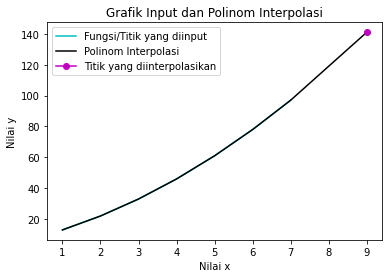

Try again? (1)Yes (2)No: 2
Progrram Stopped


In [ ]:
begin = 1
while begin == 1:
    choice = eval(input('Select your preference (1)Fungsi (2)List '))
    if choice == 1:
        formula = eval(input('Input Function :'))
        lower_bound = eval(input('lower bound : '))
        upper_bound = eval(input('upper bound : '))
        partisi = eval(input('part : '))
        eval_x = eval(input('input x value to be approximated : '))
        metode = eval(input("Choose your prefered method(1 = Lagrange, 2 = NDD): "))
        x_point = np.linspace(lower_bound, upper_bound, num = partisi)
        titik_x = [int(i) for i in x_point]
        titik_y = []
        for k in range(len(titik_x)):
            titik_y.append(formula.subs(x,titik_x[k]))
        y_aproks = LagrangePol(eval_x,titik_x,titik_y)
        header = ["x","y"]
        x_table = titik_x + [eval_x]
        x_sort = sorted(x_table)
        x_sort = list(dict.fromkeys(x_sort))
        y_table = titik_y + [int(y_aproks)]
        y_sort = sorted(y_table)
        y_sort = list(dict.fromkeys(y_sort))
        tabel = zip(x_sort,y_sort)
        tabelfix = tabulate(tabel, headers=header, tablefmt='pretty')

        if metode == 1:
            fungsipolinom = PolinomFunction(titik_x,titik_y)
            print("Polinomial Interpolasi Lagrange = {} ".format(fungsipolinom))
            print('For x = {0}, Using Lagrange, y = {1:.5f}'.format(eval_x,y_aproks))
            show = eval(input("Show (1)Tabel atau (2)Plot: "))
            if show == 1:
                print(tabelfix)
            elif show == 2:
                plt.plot(titik_x,titik_y,'c-')
                plt.plot(x_sort,y_sort,'k-')
                plt.plot(eval_x,y_aproks,'m-o')
                plt.xlabel('Nilai x')
                plt.ylabel('Nilai y')
                plt.legend(['Fungsi/Titik yang diinput','Polinom Interpolasi','Titik yang diinterpolasikan'])
                plt.title('Grafik Input dan Polinomial Interpolasi')
                plt.show()

        elif metode == 2:
            metode_ndd = eval(input("(1)Forward NDD (2)Backward NDD: "))
            table = DDTableGenerator(x_sort, y_sort)
            table0 = []
            for i in range(len(table)):
                table0.append([])
                for j in table[i]:
                    table0[i].append([])
            for i in range(len(table)):
                for j in range(len(table[i])):
                    table0[i][j] = table[j][i]
            table = table0
            for i in range(len(table)):
                table[i].insert(0, x_sort[i])
            header = ['x','y']
            for i in range (1,len(x_sort)):
                header.append('DD'+ str(i))
            tableDD = tabulate(table, headers = header, tablefmt = 'orgtbl')
            if metode_ndd == 1:
                tabel_dd = eval(input("Wanna Print the DD Table? (1)Yes (2)No: "))
                forw_approx = ForwardDD(eval_x,titik_x,titik_y)
                if tabel_dd == 1:
                    print(tableDD)
                ForwFunction = ForwardDDFunction(titik_x,titik_y)
                print("Polinomial NDD = {} ".format(ForwFunction))
                print("For x = {}, Using Forward NDD : {} ".format(str(eval_x),str(forw_approx)))
                tabelplot = eval(input("Show (1)Tabel (2)Plot: "))
                if tabelplot == 1:
                    print(tabelfix)
                elif tabelplot == 2:
                    plt.plot(titik_x,titik_y,'c-') #fungsi yang diinput user
                    plt.plot(x_sort,y_sort,'k-') #fungsi hasil aproksimasi
                    plt.plot(eval_x,forw_approx,'m-o') # nilai hasil aproksimasi
                    plt.xlabel('Nilai x')
                    plt.ylabel('Nilai y')
                    plt.legend(['Fungsi/Titik yang diinput','Polinom Interpolasi','Titik yang diinterpolasikan'])
                    plt.title('Grafik Input dan Polinom Interpolasi')
                    plt.show()

            elif metode_ndd == 2:
                tabel_dd = eval(input("Wanna Print the DD Table? (1)Yes (2)No: "))
                back_approx = BackwardDD(eval_x,titik_x,titik_y)
                BackFunction = BackwardDDFunction(titik_x,titik_y)
                print("Polinomial NDD = {} ".format(BackFunction))
                if tabel_dd == 1:
                    print(tableDD)
                print("For x = {}, Using Backward NDD is : {} ".format(str(eval_x),str(back_approx)))
                tabelplot = eval(input("Show (1)Tabel atau (2)Plot: "))
                if tabelplot == 1:
                    print(tabelfix)
                elif tabelplot == 2:
                    plt.plot(titik_x,titik_y,'c-')
                    plt.plot(x_sort,y_sort,'k-')
                    plt.plot(eval_x,back_approx,'m-o')
                    plt.xlabel('Nilai x')
                    plt.ylabel('Nilai y')
                    plt.legend(['Fungsi/Titik yang diinput','Polinom Interpolasi','Titik yang diinterpolasikan'])
                    plt.title('Grafik Input dan Polinomial Interpolasi')
                    plt.show()

        else:
            print("No method choice")
    elif choice == 2:
        titik_x = eval(input('List of x points: '))
        titik_y = eval(input('List of y points: '))
        eval_x = eval(input('Input x value to be approximated: '))
        metode = eval(input("Choose your preffered method(1 = Lagrange, 2 = NDD): "))
        while len(titik_x) == len(titik_y):
            y_aproks = LagrangePol(eval_x,titik_x,titik_y)
            header = ["x","y"]
            x_table = titik_x + [eval_x]
            x_sort = sorted(x_table)
            y_table = titik_y + [int(y_aproks)]
            y_sort = sorted(y_table)
            tabel = zip(x_sort, y_sort)
            tabelfix = tabulate(tabel, headers=header, tablefmt='pretty')
            if metode == 1:
                fungsipolinom = PolinomFunction(titik_x,titik_y)
                print("Polinomial Interpolasi Lagrange = {} ".format(fungsipolinom))
                print('For x = {0}  y = {1:.5f}'.format(eval_x,y_aproks))
                show = eval(input("Show (1)Tabel atau (2)Plot: "))
                if show == 1:
                    print(tabelfix)
                elif show == 2:
                    plt.plot(titik_x,titik_y,'c-')
                    plt.plot(x_sort,y_sort,'k-')
                    plt.plot(eval_x,y_aproks,'m-o')
                    plt.xlabel('Nilai x')
                    plt.ylabel('Nilai y')
                    plt.legend(['Fungsi/Titik yang diinput','Polinom Interpolasi','Titik yang diinterpolasikan'])
                    plt.title('Grafik Input dan Polinomial Interpolasi')
                    plt.show()

            elif metode == 2:
                metode_ndd = eval(input("(1)Forward NDD (2)Backward NDD: "))
                table = DDTableGenerator(x_sort, y_sort)
                table0 = []
                for i in range(len(table)):
                    table0.append([])
                    for j in table[i]:
                        table0[i].append([])
                for i in range(len(table)):
                    for j in range(len(table[i])):
                        table0[i][j] = table[j][i]
                table = table0
                for i in range(len(table)):
                    table[i].insert(0, x_sort[i])
                header = ['x','y']
                for i in range (1,len(x_sort)):
                    header.append('DD'+ str(i))
                tableDD = tabulate(table, headers = header, tablefmt = 'orgtbl')
                if metode_ndd == 1:
                    tabel_dd = eval(input("Wanna Print the DD Table? (1)Ya (2)Tidak: "))
                    forw_approx = ForwardDD(eval_x,titik_x,titik_y)
                    if tabel_dd == 1:
                        print(tableDD)
                    ForwFunction = ForwardDDFunction(titik_x,titik_y)
                    print("Polinomial NDD = {} ".format(ForwFunction))
                    print("For x = {0} Using Forward NDD is : {1:.7f} ".format(eval_x,forw_approx))
                    tabelplot = eval(input("Show (1)Tabel (2)Plot: "))
                    if tabelplot == 1:
                        print(tabelfix)
                    elif tabelplot == 2:
                        plt.plot(titik_x,titik_y,'c-') #fungsi yang diinput user
                        plt.plot(x_sort,y_sort,'k-') #fungsi hasil aproksimasi
                        plt.plot(eval_x,forw_approx,'m-o') # nilai hasil aproksimasi
                        plt.xlabel('Nilai x')
                        plt.ylabel('Nilai y')
                        plt.legend(['Fungsi/Titik yang diinput','Polinom Interpolasi','Titik yang diinterpolasikan'])
                        plt.title('Grafik Input dan Polinom Interpolasi')
                        plt.show()

                elif metode_ndd == 2:
                    tabel_dd = eval(input("Wanna Print the DD table? (1)Yes (2)No: "))
                    back_approx = BackwardDD(eval_x,titik_x,titik_y)
                    BackFunction = BackwardDDFunction(titik_x,titik_y)
                    print("Polinomial NDD = {} ".format(BackFunction))
                    if tabel_dd == 1:
                        print(tableDD)
                    print("For x = {0} Using Backward NDD is : {1:.7f} ".format(eval_x,back_approx))
                    tabelplot = eval(input("Show (1)Tabel atau (2)Plot: "))
                    if tabelplot == 1:
                        print(tabelfix)
                    elif tabelplot == 2:
                        plt.plot(titik_x,titik_y,'c-')
                        plt.plot(x_sort,y_sort,'k-')
                        plt.plot(eval_x,back_approx,'m-o')
                        plt.xlabel('Nilai x')
                        plt.ylabel('Nilai y')
                        plt.legend(['Fungsi/Titik yang diinput','Polinom Interpolasi','Titik yang diinterpolasikan'])
                        plt.title('Grafik Input dan Polinomial Interpolasi')
                        plt.show()

            else:
                print("No method choice")
        else:
            print("Points that x and y inputed are not the same, progrram stopped")

    begin = eval(input("Try again? (1)Yes (2)No: "))
    if begin == 2:
        print("Progrram Stopped")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols
from sympy import simplify
from tabulate import tabulate
#import module yang dibutuhkan
x = sp.symbols('x')#supaya tetap bentuk variabel
jalan = True #kondisi menjalankan iterasi

In [ ]:
def LagrangePol(x,x_points,y_points): #metode lagrange
    pol = 0 #untuk inisiasi nilai polinom diset menjadi 0
    n = len(x_points) #banyak titik yang diinput
    for k in range(n):
        L = 1 #untuk inisiasi nilai L(n,k) diset menjadi 1
        for i in range(n):
            if i!=k:
                L*=((x-x_points[i])/(x_points[k]-x_points[i])) #menghitung nilai L(n,k)
        pol += y_points[k]*L #menghitung nilai aproksimasi dengan polinom
    return pol

In [ ]:

def DDTableGenerator(x_points,y_points): #buat fungsi untuk tabel DD
    DDTable = [y_points] #kolom-kolom pada tabel, Kolom pertama berisi f
    for column in range(1,len(y_points)):
        DDcolumn = [] #isi dari setiap kolom
        for row in range(len(DDTable[-1])-1): #mulai mengisi kolom tabel
            DD = (DDTable[-1][row+1]-DDTable[-1][row])\
            /(x_points[column+row]-x_points[row])
            DDcolumn.append(DD)
        DDTable.append(DDcolumn) #tambahkan kolom yang telah diisi ke tabel
    return DDTable

In [ ]:
def ForwardDD(x,x_points,y_points): #mendefinisikan forward NDD
    DDTable = DDTableGenerator(x_points,y_points)
    pol = DDTable[0][0] #Inisiasi : suku pertama po
    mult_term = 1 #variabel untuk menyimpan nilai dari (x-x0)(x-x1)...
    for k in range(1,len(DDTable)):
        mult_term*=(x-x_points[k-1]) #menghitung (x-x0)(x-x1)...(x-x(n-1))
        pol+=DDTable[k][0]*mult_term #menghitung nilai interpolasi
    return pol

In [ ]:
def BackwardDD(x,x_points,y_points): #mendefinisikan backward NDD
    DDTable = DDTableGenerator(x_points,y_points)
    pol = DDTable[0][-1] #nilai dari polinom. Inisiasi : suku pertama po
    mult_term = 1 #variabel untuk menyimpan nilai dari (x-xn)(x-x1)...
    for k in range(1,len(DDTable)):
        mult_term*=(x-x_points[-k]) #menghitung (x-xn)(x-x(n-1))...(x-x1)
        pol+=DDTable[k][-1]*mult_term #menghitung nilai interpolasi
    return pol

Select Your Preference (1 =list, 2 = fungsi):1
Input of x : 1,2,3
Input of y : 4,5,6
Input x value to be approximated : 9
Choice your preffered method (1 = Lagrange, 2 = NDD): 1
Interpolasi Polinomial Lagrange = x + 3 
For x = 9 Using metode Lagrange is y = 12.00000
Show (1 = tabel, 2 = plot): 2


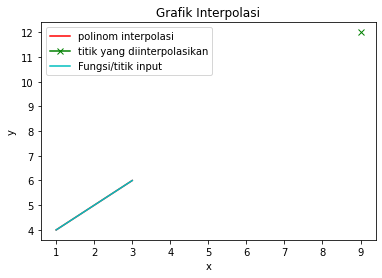

Try again? (Type 1 if yes) :1
Select Your Preference (1 =list, 2 = fungsi):1
Input of x : 2,5,9
Input of y : 4,7,9
Input x value to be approximated : 6
Choice your preffered method (1 = Lagrange, 2 = NDD): 2
Choice NDD Method (1 = Forward, 2 = Backward): 1
Polinomial NDD = -0.0714285714285714*x**2 + 1.5*x + 1.28571428571429 
For x = 6 Using forward NDD is y = 7.71429
Sow tabble NDD? (yes/no)yes
|   x |   y |   DD1 |        DD2 |
|-----+-----+-------+------------|
|   2 |   4 |   1   | -0.0714286 |
|   5 |   7 |   0.5 |            |
|   9 |   9 |       |            |
Show (1 = tabel, 2 = plot): 2


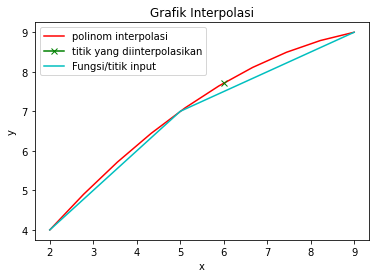

Try again? (Type 1 if yes) :2
Thank you :)


In [ ]:
while jalan==True: #syarat iterasi berjalan
    Pref=int(input('Select Your Preference (1 =list, 2 = fungsi):')) #untuk memilih metode input
    if Pref == 1: #untuk bentuk list
        titik_x = eval(input('Input of x : '))
        titik_y = eval(input('Input of y : '))
        eval_x = eval(input('Input x value to be approximated : '))
        metode = int(input('Choice your preffered method (1 = Lagrange, 2 = NDD): '))
        if metode == 1: #untuk metode lagrange
            y_aproks = LagrangePol(eval_x,titik_x,titik_y)
            polinom_lagrange = simplify(LagrangePol(x,titik_x,titik_y))

            print('Interpolasi Polinomial Lagrange = {} '.format(polinom_lagrange))
            print('For x = {0} Using metode Lagrange is y = {1:.5f}'.format(eval_x,y_aproks))

        elif metode == 2: #untuk metode NDD
            metodeNDD = int(input('Choice NDD Method (1 = Forward, 2 = Backward): '))

            if metodeNDD == 1: #forward NDD
                forw_approx = ForwardDD(eval_x,titik_x,titik_y)
                Polinom_FDD = simplify(ForwardDD(x,titik_x,titik_y))
                print('Polinomial NDD = {} '.format(Polinom_FDD))
                print('For x = {0} Using forward NDD is y = {1:.5f}'.format(eval_x,forw_approx))

            if metodeNDD == 2: #backward NDD
                back_approx = BackwardDD(eval_x,titik_x,titik_y)
                Polinom_BDD = simplify(BackwardDD(x,titik_x,titik_y))

                print("Backward DD : {0:.5f}".format(back_approx))
                print('For x = {0} Using backward NDD is y = {1:.5f}'.format(eval_x,back_approx))

            showNDD=input('Sow tabble NDD? (yes/no)')
            if showNDD == 'yes': #menampilkan tabel NDD
                h = ['x','y'] # headers
                for i in range(1,len(titik_x)):
                    h.append("DD"+str(i)) # penamaan headers di samping x dan y : DD1, DD2, dst.
                t = []
                tabel = DDTableGenerator(titik_x,titik_y) # tabel DD
                for i in range(len(titik_x)):
                    barisDD = [] # isi baris
                    barisDD.append(titik_x[i])
                    for j in range(len(titik_x)-i): # proses mengisi baris
                        barisDD.append(tabel[j][i])
                    t.append(barisDD) # tambahkan baris pada tabel DD
                print(tabulate(t, headers = h, tablefmt = "orgtbl"))

        Visual = int(input('Show (1 = tabel, 2 = plot): '))

        if Visual == 1: #jika memilih tabel
            table = []
            if metode ==1: #menampilkan tabel lagrange
                pol = LagrangePol(eval_x,titik_x,titik_y)
            elif metode == 2: #menampilkan tabel NDD
                if metodeNDD == 1: #tabel forward NDD
                    pol = ForwardDD(eval_x,titik_x,titik_y)
                elif metodeNDD == 2: #tabel backward NDD
                    pol = BackwardDD(eval_x,titik_x,titik_y)
            titik_x.append(eval_x)
            titik_y.append(pol)
            sort = sorted(titik_x)
            for i in range(len(titik_x)):
                for j in range(len(titik_y)):
                    if sort[i] == titik_x[j]:
                        table.append([sort[i], titik_y[j]])
            print(tabulate(table, headers = ["x","y"], tablefmt = "pretty", numalign = "center", stralign = "center", floatfmt = ".7f"))
            #menampilkan tabel
        if Visual == 2: #jika memilih plot
            if metode ==1:#plot lagrange
                pol = str(LagrangePol(x,titik_x,titik_y))
            elif metode == 2:#plot NDD
                if metodeNDD == 1:#plot forward NDD
                    pol = str(ForwardDD(x,titik_x,titik_y))
                elif metodeNDD == 2:#plot backward NDD
                    pol = str(BackwardDD(x,titik_x,titik_y))
            def f(x):
                return eval(pol)

            x1 = np.linspace(titik_x[0],titik_x[len(titik_x)-1],10) # titik x
            y1 = f(x1) # nilai persamaan x
            x3 = eval_x # titik yang diinterpolasikan
            y3 = f(x3) # nilai titik yang diinterpolasikan
            plt.plot(x1,y1,'r-') # merah
            plt.plot(x3,y3,'g-x') # bentuk x
            plt.plot(titik_x,titik_y,'c-')# titik/fungsi input
            plt.xlabel('x')#label x
            plt.ylabel('y')#label y
            plt.title("Grafik Interpolasi") # membuat judul
            plt.legend(["polinom interpolasi","titik yang diinterpolasikan","Fungsi/titik input"]) # membuat keterangan mengenai plot
            plt.show() # menampilkan plot

    elif Pref ==2: #untuk bentuk fungsi
        formula = eval(str(input("Input function : ")))
        def f(x):
            return eval(formula)
        lower_bound = eval(input('lower bound : '))
        upper_bound = eval(input('Upper bound : '))
        partisi = eval(input('Part : '))
        eval_x = eval(input('input x to be approximated : '))
        x_point = np.linspace(lower_bound, upper_bound, num = partisi)
        titik_x = [int(i) for i in x_point] #mendefinisikan titik x
        titik_y = [] #mendefinisikan titik y
        for k in range(len(titik_x)):
            titik_y.append(formula.subs(x,titik_x[k]))

        metode = int(input('Select your preffered method (1 = Lagrange, 2 = NDD): '))
        if metode == 1: #untuk metode lagrange
            y_aproks = LagrangePol(eval_x,titik_x,titik_y)
            polinom_lagrange = simplify(LagrangePol(x,titik_x,titik_y))

            print('Interpolasi Polinomial Lagrange = {} '.format(polinom_lagrange))
            print('For x = {0} Using Lagrange is y = {1:.5f}'.format(eval_x,y_aproks))

        elif metode == 2: #untuk metode NDD
            metodeNDD = int(input('Choice NDD Method (1 = Forward, 2 = Backward): '))

            if metodeNDD == 1: #untuk metode forward
                forw_approx = ForwardDD(eval_x,titik_x,titik_y)
                Polinom_FDD = simplify(ForwardDD(x,titik_x,titik_y))
                print('Polinomial NDD = {} '.format(Polinom_FDD))
                print('For x = {0} Using forward NDD is y = {1:.5f}'.format(eval_x,forw_approx))

            if metodeNDD == 2: #untuk metode backward
                back_approx = BackwardDD(eval_x,titik_x,titik_y)
                Polinom_BDD = simplify(BackwardDD(x,titik_x,titik_y))

                print("Backward DD : {0:.5f}".format(back_approx))
                print('For x = {0} Using backward NDD is y = {1:.5f}'.format(eval_x,back_approx))

            showNDD=input('Show NDD table? (yes/no)')
            if showNDD == 'yes': #menampilkan tabel NDD
                h = ['x','y'] # headers
                for i in range(1,len(titik_x)):
                    h.append("DD"+str(i)) # penamaan headers di samping x dan y : DD1, DD2, dst.
                t = []
                tabel = DDTableGenerator(titik_x,titik_y) # tabel DD
                for i in range(len(titik_x)):
                    barisDD = [] # isi baris
                    barisDD.append(titik_x[i])
                    for j in range(len(titik_x)-i): # proses mengisi baris
                        barisDD.append(tabel[j][i])
                    t.append(barisDD) # tambahkan baris pada tabel DD
                print(tabulate(t, headers = h, tablefmt = "orgtbl"))

        Visual = int(input('Show (1 = tabel, 2 = plot): '))

        if Visual == 1: #jika memilih tabel
            table = []
            if metode ==1:#tabel lagrange
                pol = LagrangePol(eval_x,titik_x,titik_y)
            elif metode == 2:#tabel NDD
                if metodeNDD == 1:#tabel forward NDD
                    pol = ForwardDD(eval_x,titik_x,titik_y)
                elif metodeNDD == 2:#tabel backward NDD
                    pol = BackwardDD(eval_x,titik_x,titik_y)
            titik_x.append(eval_x)
            titik_y.append(pol)
            sort = sorted(titik_x)
            for i in range(len(titik_x)):
                for j in range(len(titik_y)):
                    if sort[i] == titik_x[j]:
                        table.append([sort[i], titik_y[j]])
            print(tabulate(table, headers = ["x","y"], tablefmt = "pretty", numalign = "center", stralign = "center", floatfmt = ".7f"))
            #menampilkan tabel
        if Visual == 2: #jika memilih plot
            if metode ==1:#plot lagrange
                pol = str(LagrangePol(x,titik_x,titik_y))
            elif metode == 2:#plot NDD
                if metodeNDD == 1:#plot forward NDD
                    pol = str(ForwardDD(x,titik_x,titik_y))
                elif metodeNDD == 2:#plot backward NDD
                    pol = str(BackwardDD(x,titik_x,titik_y))
            def f(x):
                return eval(pol)

            x1 = np.linspace(titik_x[0],titik_x[len(titik_x)-1],10) # titik x
            y1 = f(x1) # nilai persamaan x
            x3 = eval_x # titik yang diinterpolasikan
            y3 = f(x3) # nilai titik yang diinterpolasikan
            plt.plot(x1,y1,'r-') # merah
            plt.plot(x3,y3,'g-x') # bentuk x
            plt.plot(titik_x,titik_y,'c-')# fungsi/titik input
            plt.xlabel('x')#label x
            plt.ylabel('y')#label y
            plt.title("Grafik Interpolasi") # membuat judul
            plt.legend(["polinom interpolasi","titik yang diinterpolasikan","Fungsi/titik input"]) # membuat keterangan mengenai plot
            plt.show() # menampilkan plot



    else:#apabila input tidak sesuai
        print('Sorry, your input is false')
        break

    Attempt=(input('Try again? (Type 1 if yes) :'))#penentu apakah program lanjut atau berhenti
    if Attempt == '1':
        continue
    else:
        print('Thank you :)')
        jalan = False

